In [1]:
#part1 identifying the frauds with the som

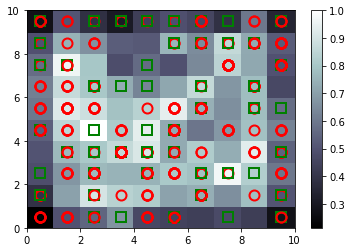

Fraud Customer IDs
15597709
15587266
15567860
15604130
15624423
15604196
15587297
15609823
15614813
15711249
15658504
15700046
15569595
15587443
15665181


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('./soms/Credit_Card_Applications.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X_scaled=sc.fit_transform(X)
#training the som
from minisom import MiniSom 
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled,num_iteration=100)
#visualizing the results
from pylab import bone, pcolor, colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
#red-for not approved green-for approved
markers=['o','s']
colors=['r','g']
for i,x  in enumerate(X_scaled):
    w=som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor='None',markersize = 10,
         markeredgewidth = 2)
show()
    
mappings=som.win_map(X_scaled)
fraud=np.concatenate((mappings[(1,2)],mappings[(4,2)]),axis=0)
fraud=sc.inverse_transform(fraud)
print('Fraud Customer IDs')
for i in fraud[:, 0]:
  print(int(i))



In [5]:
#part2 going from unsupervised to supervised deep learning

#creating the matrix of features
customers=data.iloc[:,1:].values

#creating a dependent variable
is_fraud=np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i,0] in fraud:
        is_fraud[i]=1


In [8]:
#building model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
ann= Sequential()

ann.add(Dense(2,kernel_initializer='uniform' ,activation='relu',input_dim=15))
ann.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [9]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2,verbose=2)


Epoch 1/2
690/690 - 1s - loss: 0.4661 - accuracy: 0.9768
Epoch 2/2
690/690 - 0s - loss: 0.2393 - accuracy: 0.9783


In [10]:
#predicting the probabilty of frauds
y_pred=ann.predict(customers)

In [12]:
# y_pred

In [13]:
y_pred=np.concatenate((data.iloc[:,0:1].values,y_pred),axis=1)
    

In [14]:
y_pred

array([[1.57761560e+07, 5.95150292e-02],
       [1.57395480e+07, 3.15937102e-02],
       [1.56628540e+07, 2.06043422e-02],
       ...,
       [1.56754500e+07, 8.23983252e-02],
       [1.57764940e+07, 1.42293930e-01],
       [1.55924120e+07, 7.45704472e-02]])

In [15]:
y_pred=y_pred[y_pred[:,1].argsort()]


In [16]:
y_pred

array([[1.56058720e+07, 5.79896569e-03],
       [1.57067620e+07, 1.18008256e-02],
       [1.55681620e+07, 1.46612227e-02],
       ...,
       [1.56577780e+07, 3.08162451e-01],
       [1.55688190e+07, 3.08162451e-01],
       [1.57504760e+07, 3.08162451e-01]])